In [234]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

df_raw=pd.read_csv('/Users/dane/src/fitbit/fb_apple.csv', index_col='date')

# only keep some of the columns
colnames = dict(steps='steps_fb', distance='dist_fb', steps_aw='steps_ap', dist_aw='dist_ap')
df = df_raw[['steps','distance','steps_aw','dist_aw', 'biking']].rename(columns=colnames)

df_fbap = df[(df.steps_ap != ' NA') & (df.index >= '2015-06-01') & (df.index <= '2016-03-31')]
df_fbap = df_fbap.convert_objects(convert_numeric=True)

# add the Steps Per Mile for both FB and AP
df_fbap['spm_fb'] = df_fbap['steps_fb'] / df_fbap['dist_fb']
df_fbap['spm_ap'] = df_fbap['steps_ap'] / df_fbap['dist_ap']
df_fbap.describe()

,steps_fb,dist_fb,steps_ap,dist_ap,biking,spm_fb,spm_ap
count,305.000000,305.000000,305.000000,305.000000,100.000000,305.000000,305.000000
mean,16693.416393,7.935915,16976.144236,8.582854,13.722000,2415.796815,1980.823383
std,4210.248876,2.259363,4403.617146,2.233116,3.373353,2669.760122,96.837027
min,6521.000000,0.734461,91.000000,0.045215,4.700000,2005.468750,1403.167349
25%,14106.000000,6.760000,14173.000000,7.166081,11.500000,2041.550054,1920.224623
50%,16227.000000,7.860000,16452.732264,8.357810,13.550000,2042.346209,1965.477238
75%,18825.000000,9.210000,19369.000000,9.869648,16.000000,2042.897727,2024.227749
max,30621.000000,14.990000,30367.000000,15.071708,25.300000,30572.500000,2570.080288


Looking at this somethihg is wrong with the spm_fb with a max of 30K. Let's take a look at the values over 2100.

In [235]:
df_fbap[df_fbap.spm_fb > 2100]

,steps_fb,dist_fb,steps_ap,dist_ap,biking,spm_fb,spm_ap
date,,,,,,,
2015-06-08,21526,0.734461,20824.000000,9.961960,NaN,29308.567780,2090.351638
2015-06-09,16824,2.500597,16110.568142,7.483668,NaN,6727.993355,2152.763575
2015-08-19,14585,3.819196,13706.000000,6.875319,NaN,3818.866589,1993.507459
2015-08-28,19323,1.664778,21036.237339,10.335941,11.7,11606.952999,2035.251354
2015-10-14,9287,1.100000,9585.000000,4.767040,NaN,8442.727273,2010.681810
2015-10-25,26844,2.790951,26873.000000,13.697527,NaN,9618.226905,1961.887045
2015-10-28,15339,4.466990,17329.000000,9.329743,11.5,3433.855907,1857.393006
2015-10-31,29717,3.100000,30367.000000,15.071708,NaN,9586.129032,2014.834732
2015-12-05,17190,0.800000,17753.000000,9.289279,NaN,21487.500000,1911.127924


Looking at these days, the steps look fine and it seems the distance values are just wrong so let's fix the distance by re-computing the distance based on the median step value of 2042.

In [236]:
df_fbap.ix[df_fbap.spm_fb > 2100, 'dist_fb'] = df_fbap.steps_fb / 2042.
#df_fbap.describe()
# recompute the spm
df_fbap['spm_fb'] = df_fbap['steps_fb'] / df_fbap['dist_fb']
df_fbap.describe()

,steps_fb,dist_fb,steps_ap,dist_ap,biking,spm_fb,spm_ap
count,305.000000,305.000000,305.000000,305.000000,100.000000,305.000000,305.000000
mean,16693.416393,8.177762,16976.144236,8.582854,13.722000,2041.425274,1980.823383
std,4210.248876,2.063827,4403.617146,2.233116,3.373353,4.270340,96.837027
min,6521.000000,3.190000,91.000000,0.045215,4.700000,2005.468750,1403.167349
25%,14106.000000,6.920000,14173.000000,7.166081,11.500000,2041.550054,1920.224623
50%,16227.000000,7.950000,16452.732264,8.357810,13.550000,2042.235123,1965.477238
75%,18825.000000,9.230000,19369.000000,9.869648,16.000000,2042.834138,2024.227749
max,30621.000000,14.990000,30367.000000,15.071708,25.300000,2044.200627,2570.080288


The spm_fb seems very grouped around 2041 but the min of 2005 is interesting.  Was it just set wrong for a period of time?

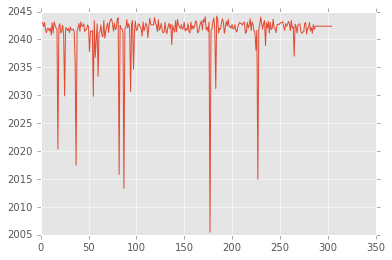

In [237]:
plt.plot(np.arange(len(df_fbap)), df_fbap.spm_fb)

Clearly this is not just a setting in the Fitbit app but some other kind of hickup.

# Data Sources

The Fitbit data comes initially from a Fitbit Flex and since November 22, 2015 from a Fitbit One (after the Flex died). For the Apple data, the data prior to June 1, 2015 came from the sensors in the iPhone 6 while the data after that date is from the Apple Watch.  Because the iPhone and Watch are such different devices, especially in how they are worn, I have separated these into 2 different data sets.

Since steps are the base data that all devices cover it seems natural to plot the steps from the devices against each other.

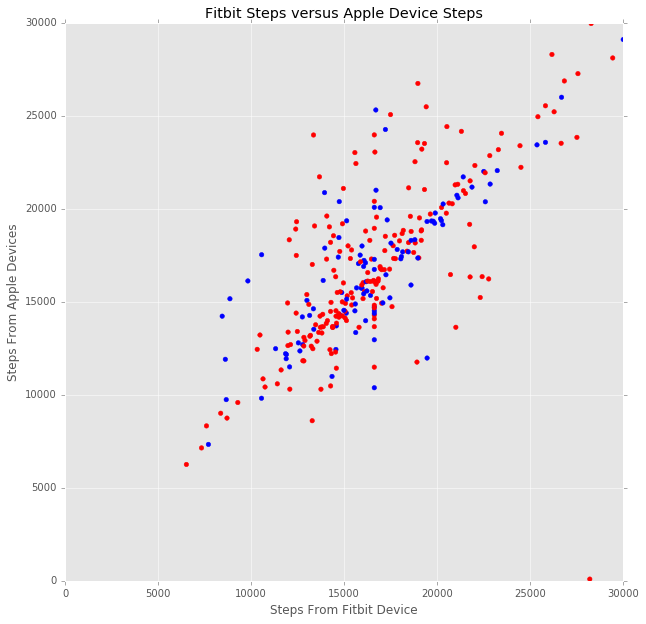

In [244]:
red = '#ff0000'
blue = '#0000ff'
phone = red
watch = blue
df_fbap.ix[df_fbap.index < '2015-06-01', 'color'] = phone
df_fbap.ix[df_fbap.index >= '2015-06-01', 'color'] = watch
fig = plt.gcf()
fig.set_size_inches(10,10) 
plt.scatter(df_fbap.steps_fb, df_fbap.steps_ap, color=outliers.biking.apply(lambda x: red if x>1 else blue))
plt.xlim([0,30000])
plt.ylim([0,30000])
plt.title('Fitbit Steps versus Apple Device Steps')
plt.xlabel('Steps From Fitbit Device')
plt.ylabel('Steps From Apple Devices')
#ip_patch = mpatches.Patch(color=phone, label='iPhone 6')
#w_patch = mpatches.Patch(color=watch, label='Apple Watch')
#plt.legend(handles=[ip_patch, w_patch], bbox_to_anchor=[0.3,0.8])
plt.show()


There is clearly a lot of commonality in the values reported but the data matches much worse than I expected.  It appears that the watch data may be closer but it is too hard to tell in this representation.

A better way of doing this may be to compute a percent difference between the two step values and look at these in a histogram.

In [283]:
# let's separate the phone and watch data
df_phone = df_fbap[df_fbap.color == phone].copy()
df_watch = df_fbap[df_fbap.color == watch].copy()

df_watch['sdiff'] = 100*(df_watch.steps_ap - df_watch.steps_fb) / df_watch.steps_fb
df_watch['ddiff'] = 100*(df_watch.dist_ap - df_watch.dist_fb) / df_watch.dist_fb

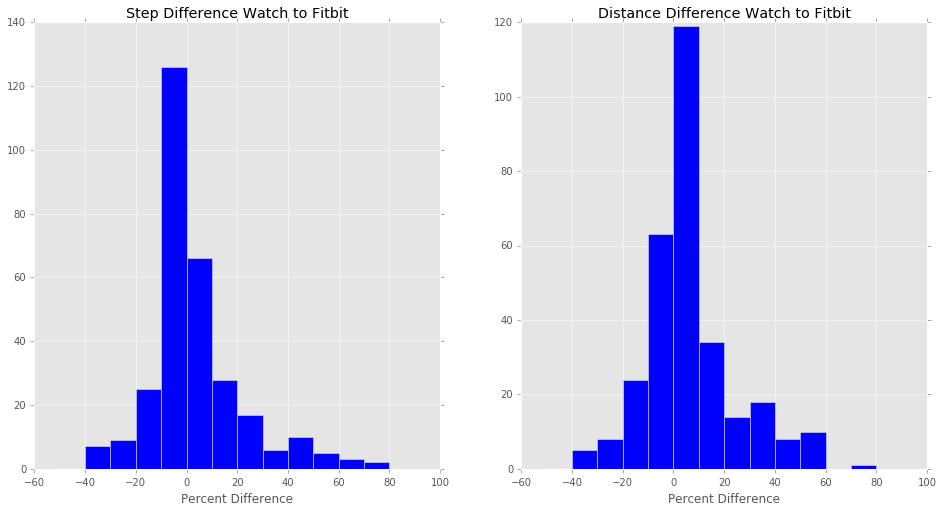

In [286]:
plt.figure(1, figsize=(16,8))
#fig.set_size_inches(16,8)
plt.subplot(121) # numrows, numcols, fignum
df_watch.sdiff.hist(bins=np.arange(-50, 100, 10), color=watch)
plt.title('Step Difference Watch to Fitbit')
plt.xlabel('Percent Difference')
plt.subplot(122)
df_watch.ddiff.hist(bins=np.arange(-50, 100, 10), color=watch)
plt.title('Distance Difference Watch to Fitbit')
plt.xlabel('Percent Difference')
plt.show()

In [263]:
df_watch.describe()

,steps_fb,dist_fb,steps_ap,dist_ap,biking,spm_fb,spm_ap,sdiff
count,305.000000,305.000000,305.000000,305.000000,100.000000,305.000000,305.000000,305.000000
mean,16693.416393,8.177762,16976.144236,8.582854,13.722000,2041.425274,1980.823383,3.269170
std,4210.248876,2.063827,4403.617146,2.233116,3.373353,4.270340,96.837027,19.250321
min,6521.000000,3.190000,91.000000,0.045215,4.700000,2005.468750,1403.167349,-99.677419
25%,14106.000000,6.920000,14173.000000,7.166081,11.500000,2041.550054,1920.224623,-4.635594
50%,16227.000000,7.950000,16452.732264,8.357810,13.550000,2042.235123,1965.477238,-0.952791
75%,18825.000000,9.230000,19369.000000,9.869648,16.000000,2042.834138,2024.227749,8.121473
max,30621.000000,14.990000,30367.000000,15.071708,25.300000,2044.200627,2570.080288,79.443851


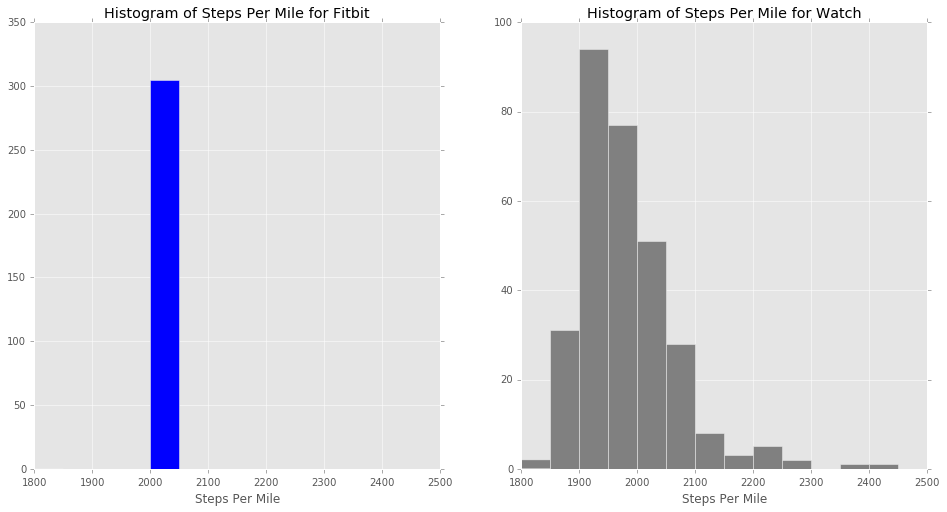

In [280]:
plt.figure(1, figsize=(16,8))
plt.subplot(121) # numrows, numcols, fignum
df_watch.spm_fb.hist(bins=np.arange(1800, 2500, 50), color="blue")
plt.title('Histogram of Steps Per Mile for Fitbit')
plt.xlabel('Steps Per Mile')
plt.subplot(122)
df_watch.spm_ap.hist(bins=np.arange(1800, 2500, 50), color='grey')
plt.title('Histogram of Steps Per Mile for Watch')
plt.xlabel('Steps Per Mile')
plt.show()

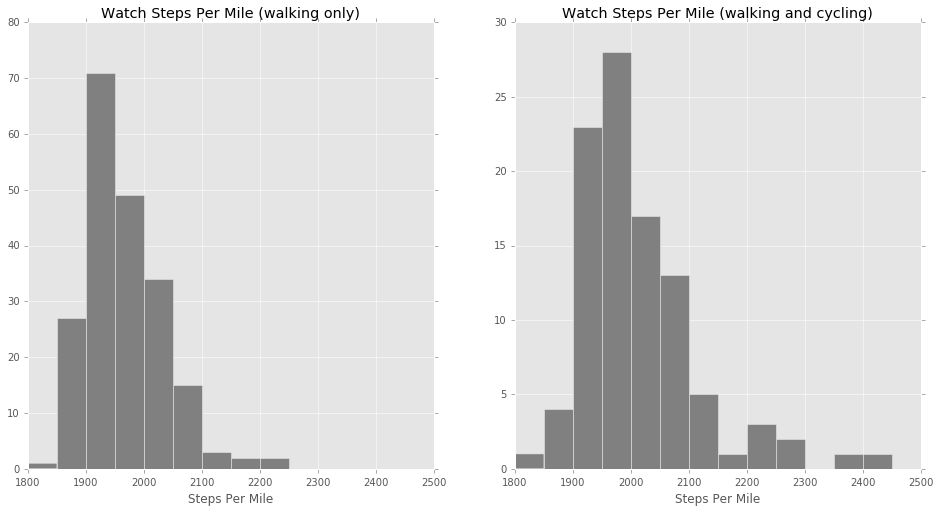

In [281]:
plt.figure(1, figsize=(16,8))
plt.subplot(121) # numrows, numcols, fignum
df_watch[df_watch.biking.isnull()].spm_ap.hist(bins=np.arange(1800, 2500, 50), color='grey')
plt.title('Watch Steps Per Mile (walking only)')
plt.xlabel('Steps Per Mile')
plt.subplot(122)
df_watch[df_watch.biking>0].spm_ap.hist(bins=np.arange(1800, 2500, 50), color='grey')
plt.title('Watch Steps Per Mile (walking and cycling)')
plt.xlabel('Steps Per Mile')
plt.show()

In [269]:
df_watch[(df_watch.spm_ap>1500) & (df_watch.biking.isnull())].describe()

,steps_fb,dist_fb,steps_ap,dist_ap,biking,spm_fb,spm_ap,sdiff
count,204.000000,204.000000,204.000000,204.000000,0,204.000000,204.000000,204.000000
mean,16885.426471,8.271974,16628.651381,8.460797,NaN,2041.393079,1965.519036,-0.624413
std,4279.624151,2.097796,4461.286916,2.241240,NaN,4.431457,69.395425,14.547920
min,6521.000000,3.190000,91.000000,0.045215,NaN,2005.468750,1847.484527,-99.677419
25%,14382.750000,7.040000,13819.750000,7.147554,NaN,2041.586045,1912.834544,-4.673839
50%,16625.000000,8.140000,16111.784071,8.284356,NaN,2042.314726,1950.978596,-1.899686
75%,19027.500000,9.315000,19335.750000,9.666027,NaN,2042.834306,2007.568874,2.055283
max,30621.000000,14.990000,30367.000000,15.071708,NaN,2044.200627,2249.735002,68.425729


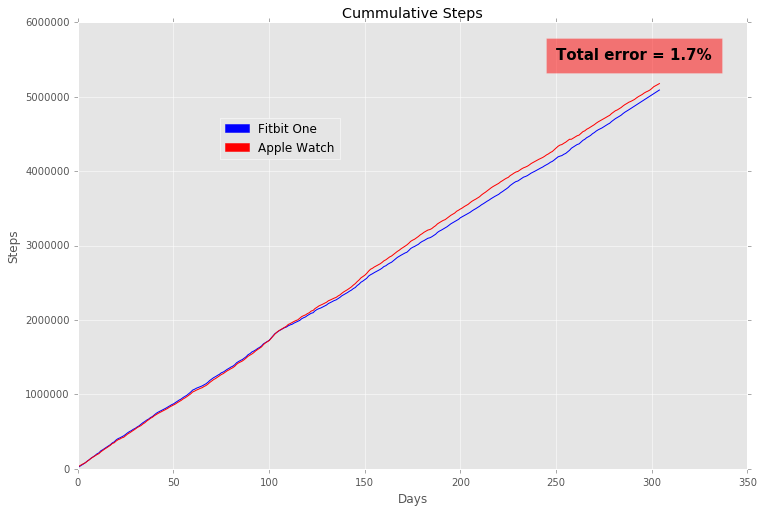

In [310]:
#plt.plot(x=np.arange(df_watch), y=[df_watch.dist_fb.cumsum(),df_watch.dist_ap.cumsum()])
fb = df_watch.steps_fb.cumsum()

ap = df_watch.steps_ap.cumsum()
x = np.arange(len(ap))
fig = plt.gcf()
fig.set_size_inches(12,8)
plt.plot(x, fb, 'b-',  x, ap, 'r-')
plt.title('Cummulative Steps')
plt.ylabel('Steps')
plt.xlabel('Days')
fb_patch = mpatches.Patch(color=blue, label='Fitbit One')
ap_patch = mpatches.Patch(color=red, label='Apple Watch')
plt.legend(handles=[fb_patch, ap_patch], bbox_to_anchor=[0.4,0.8])
plt.gca().text(250, 5500000, 'Total error = 1.7%', fontweight='bold', fontsize=15,
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.show()

In [311]:
sum(df_watch.steps_ap)

5177723.9920594189

In [271]:
5280/2.5

2112.0

In [ ]:
tmp[tmp.spm > 1800].spm.median()

In [ ]:
tmp[(tmp.spm > 1800) & (tmp.index < '2015-06-01') ].spm.hist(bins=20)

In [ ]:
dfp.goalmet_cindy.value_counts()

In [ ]:
dfp.goalmet_dane.value_counts()

In [ ]:
fig = plt.gcf()
fig.set_size_inches(12,12)
df45w.ix[df45w.index.year==2014, 'color'] = '#FF0000'  #  red
df45w.ix[df45w.index.year==2015, 'color'] = '#0000FF'  #  blue
xx = df45w[(df45w.steps_dane>1000) & (df45w.steps_cindy>1000) & (df45w.steps_cindy<35000)]
#plt.scatter(df45w.steps_dane, df45w.steps_cindy, color=df45w.color, s=30)
plt.scatter(xx.steps_dane, xx.steps_cindy, color=xx.color, s=30)
plt.title('Steps by Year')
plt.xlabel('dane')
plt.ylabel('cindy')

In [ ]:
df45w.ix[df45w.Travel=='Work', 'color'] = '#FF0000'      # Work is red
df45w.ix[pd.isnull(df45w.Travel), 'color'] = '#00AA00'   # none is green
df45w.ix[df45w.Travel=='Vacation', 'color'] = '#0000FF'  # Vacation is blue
red = '#FF0000'
green = '#00AA00'
blue = '#0000FF'
cmap = {'Work': red, 'Vacation': blue}

color = df45w.Travel.apply(lambda x: cmap.get(x, green))

fig = plt.gcf()
fig.set_size_inches(18,5)
plt.figure(1)
plt.subplot(211)
dfp = df45w[(df45w.index <= '2014-12-31')]
plt.bar(dfp.index, dfp.goalmet_dane, color=dfp.Travel.apply(lambda x: cmap.get(x, green)))
plt.yticks([-1.1,1.1])
plt.gca().set_yticklabels(['Not Met', 'Goal Met'])
plt.subplot(212)
dfp = df45w[(df45w.index >= '2015-01-01')&(df45w.index <= '2015-12-31')]
plt.bar(dfp.index, dfp.goalmet_dane, color=dfp.Travel.apply(lambda x: cmap.get(x, green)))
plt.yticks([-1.1,1.1])
plt.gca().set_yticklabels(['Not Met', 'Goal Met'])
plt.show()

In [ ]:
red = '#FF0000'
green = '#00AA00'
blue = '#0000FF'
fig = plt.gcf()
fig.set_size_inches(18,3)
plt.figure(1)
dfp = df45w[(df45w.index >= '2015-01-01')&(df45w.index <= '2015-12-31')]
plt.bar(dfp.index, dfp.goalmet_dane, color=dfp.biking_dane.apply(lambda x: green if x>0 else red))
plt.yticks([-1.1,1.1])
plt.gca().set_yticklabels(['Not Met', 'Goal Met'])
plt.show()

In [ ]:
dfp.head()